<a href="https://colab.research.google.com/github/nhjung-phd/TimeSeriesAnalysis/blob/main/notebooks/04_ADF_KPSS_TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADF 검정

[*********************100%***********************]  1 of 1 completed


🔎 [원 데이터] 일별 종가 (앞부분):
Date
2022-01-03    399.926666
2022-01-04    383.196655
2022-01-05    362.706665
2022-01-06    354.899994
2022-01-07    342.320007
Name: Close, dtype: float64



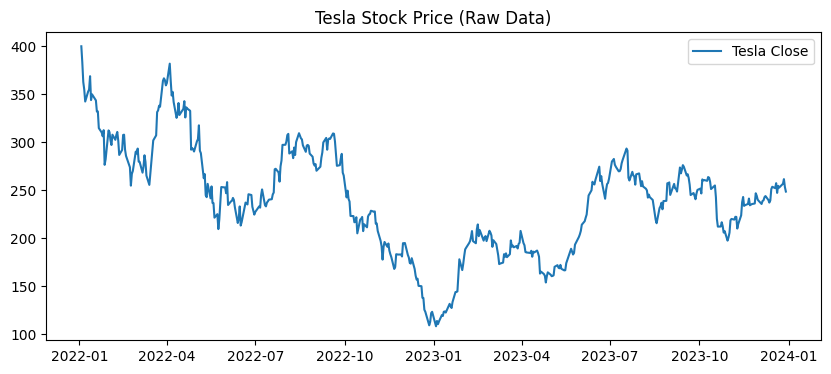

=== ADF Test on Original Series ===
ADF Statistic: -2.8159
p-value: 0.056040
Used Lag: 9
Number of Observations Used for ADF Regression and Critical Values: 491
Critical Values:
   1%, -3.444
   5%, -2.867
   10%, -2.570
결과 해석: p-value < 0.05 이면 유의 수준(5%)에서 '단위근이 없다'(즉, 정상성)로 판단.



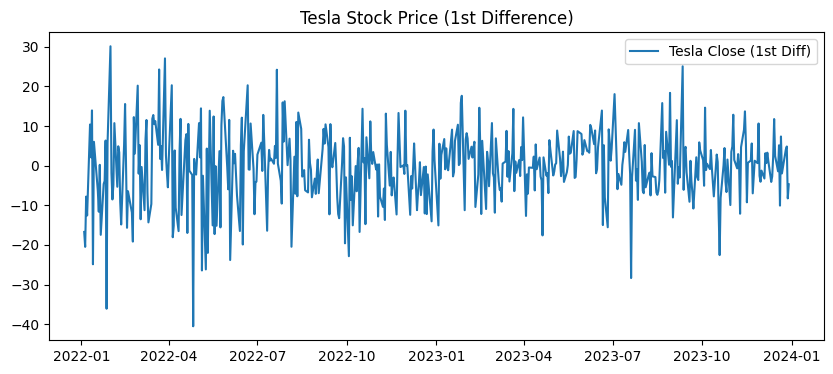

=== ADF Test on 1st-Differenced Series ===
ADF Statistic: -5.7943
p-value: 0.000000
Used Lag: 8
Number of Observations Used: 491
Critical Values:
   1%, -3.444
   5%, -2.867
   10%, -2.570

결과 해석:
 - 만약 1차 차분 후 p-value < 0.05가 되면, '1차 차분된 시계열이 정상성을 만족한다'고 볼 수 있음.


In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# ADF(단위근) 검정 함수
from statsmodels.tsa.stattools import adfuller

# 1) 데이터 불러오기: 테슬라(TSLA) 주가
df = yf.download("TSLA", start="2022-01-01", end="2024-01-01")

# 혹시 MultiIndex로 반환될 경우 대비
df.columns = df.columns.droplevel(1)  # ('Close','TSLA') → 'Close'
df.reset_index(inplace=True)

# 'Date'를 인덱스로 설정
df.set_index("Date", inplace=True)

# 'Close' 열을 시계열로 사용
ts_data = df["Close"].dropna()

print("🔎 [원 데이터] 일별 종가 (앞부분):")
print(ts_data.head())
print()

# 2) 시계열 플롯 확인
plt.figure(figsize=(10,4))
plt.plot(ts_data, label="Tesla Close")
plt.title("Tesla Stock Price (Raw Data)")
plt.legend()
plt.show()

# 3) ADF 검정 (원 데이터)
print("=== ADF Test on Original Series ===")
adf_result_0 = adfuller(ts_data, autolag="AIC")
adf_stat_0, p_value_0, usedlag_0, nobs_0, crit_vals_0, icbest_0 = adf_result_0

print(f"ADF Statistic: {adf_stat_0:.4f}")
print(f"p-value: {p_value_0:.6f}")
print(f"Used Lag: {usedlag_0}")
print(f"Number of Observations Used for ADF Regression and Critical Values: {nobs_0}")
print("Critical Values:")
for k, v in crit_vals_0.items():
    print(f"   {k}, {v:.3f}")
print("결과 해석:",
      "p-value < 0.05 이면 유의 수준(5%)에서 '단위근이 없다'(즉, 정상성)로 판단.\n")

# 4) 1차 차분(differencing) 후 ADF 검정
diff_data = ts_data.diff().dropna()

plt.figure(figsize=(10,4))
plt.plot(diff_data, label="Tesla Close (1st Diff)")
plt.title("Tesla Stock Price (1st Difference)")
plt.legend()
plt.show()

print("=== ADF Test on 1st-Differenced Series ===")
adf_result_1 = adfuller(diff_data, autolag="AIC")
adf_stat_1, p_value_1, usedlag_1, nobs_1, crit_vals_1, icbest_1 = adf_result_1

print(f"ADF Statistic: {adf_stat_1:.4f}")
print(f"p-value: {p_value_1:.6f}")
print(f"Used Lag: {usedlag_1}")
print(f"Number of Observations Used: {nobs_1}")
print("Critical Values:")
for k, v in crit_vals_1.items():
    print(f"   {k}, {v:.3f}")

print("\n결과 해석:")
print(" - 만약 1차 차분 후 p-value < 0.05가 되면,",
      "'1차 차분된 시계열이 정상성을 만족한다'고 볼 수 있음.")


#ADF 검정 예제: 테슬라 주가 (p-value에 따른 결과 분기)

[*********************100%***********************]  1 of 1 completed


=== [원시계열: Tesla Close] 상위 5개 데이터 ===
Date
2022-01-03    399.926666
2022-01-04    383.196655
2022-01-05    362.706665
2022-01-06    354.899994
2022-01-07    342.320007
Name: Close, dtype: float64



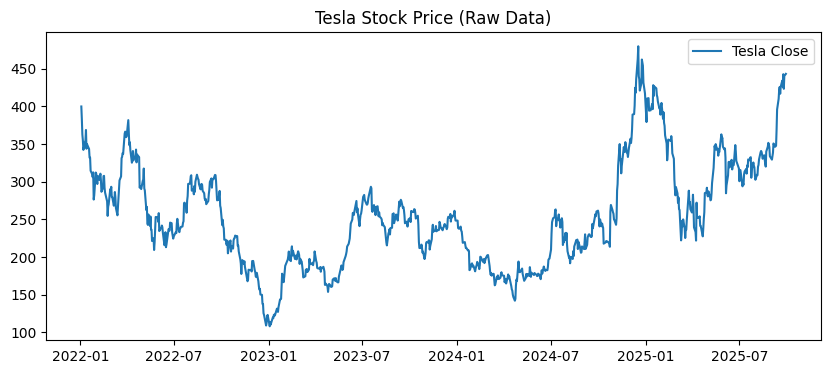

=== ADF Test on: Tesla Close (Original) ===
ADF Statistic  : -1.9738
p-value        : 0.298185
Used Lag       : 10
# of Obs       : 927
Critical Values:
    1%: -3.437
    5%: -2.865
    10%: -2.568
--> p-value >= 0.05, 귀무가설(단위근 존재) 기각 불가
    => 비정상(Non-stationary) 시계열일 가능성이 큽니다.



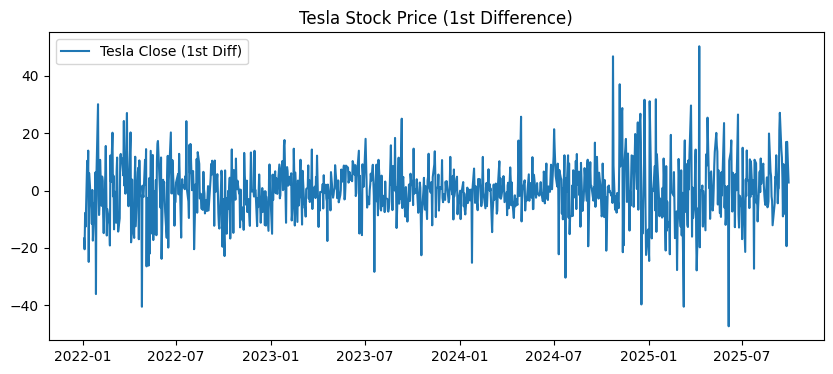

=== ADF Test on: Tesla Close (1st Differenced) ===
ADF Statistic  : -8.8051
p-value        : 0.000000
Used Lag       : 9
# of Obs       : 927
Critical Values:
    1%: -3.437
    5%: -2.865
    10%: -2.568
--> p-value < 0.05, 귀무가설(단위근 존재)을 기각
    => 정상성(Stationary) 시계열로 볼 수 있습니다.



In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# ADF(단위근) 검정 함수
from statsmodels.tsa.stattools import adfuller

# ---------------------------
# (1) 테슬라(TSLA) 주가 불러오기
# ---------------------------
df = yf.download("TSLA", start="2022-01-01", end="2025-09-30")

# MultiIndex 제거 (yfinance가 columns를 다단계로 반환할 수 있음)
df.columns = df.columns.droplevel(1)
df.reset_index(inplace=True)

# 'Date'를 인덱스로 설정
df.set_index("Date", inplace=True)

# Close 열을 시계열로 추출, 결측 제거
ts_data = df["Close"].dropna()

print("=== [원시계열: Tesla Close] 상위 5개 데이터 ===")
print(ts_data.head())
print()

# ---------------------------
# (2) 시계열 Plot
# ---------------------------
plt.figure(figsize=(10,4))
plt.plot(ts_data, label="Tesla Close")
plt.title("Tesla Stock Price (Raw Data)")
plt.legend()
plt.show()

# ---------------------------
# (3) ADF 검정 함수 정의
# ---------------------------
def run_adf_test(series, label="Time Series", alpha=0.05):
    """ADF 검정을 수행하고, p-value에 따른 정상성 여부를 출력한다."""
    adf_result = adfuller(series, autolag="AIC")
    adf_stat, p_val, usedlag, nobs, crit_vals, icbest = adf_result

    print(f"=== ADF Test on: {label} ===")
    print(f"ADF Statistic  : {adf_stat:.4f}")
    print(f"p-value        : {p_val:.6f}")
    print(f"Used Lag       : {usedlag}")
    print(f"# of Obs       : {nobs}")
    print("Critical Values:")
    for k, v in crit_vals.items():
        print(f"    {k}: {v:.3f}")

    # 결과 분기 로직: p-value 기준
    if p_val < alpha:
        print(f"--> p-value < {alpha}, 귀무가설(단위근 존재)을 기각")
        print("    => 정상성(Stationary) 시계열로 볼 수 있습니다.\n")
    else:
        print(f"--> p-value >= {alpha}, 귀무가설(단위근 존재) 기각 불가")
        print("    => 비정상(Non-stationary) 시계열일 가능성이 큽니다.\n")

# ---------------------------
# (4) ADF 검정 (원 시계열)
# ---------------------------
run_adf_test(ts_data, label="Tesla Close (Original)")

# ---------------------------
# (5) 1차 차분 후 ADF 검정
# ---------------------------
diff_data = ts_data.diff().dropna()

plt.figure(figsize=(10,4))
plt.plot(diff_data, label="Tesla Close (1st Diff)")
plt.title("Tesla Stock Price (1st Difference)")
plt.legend()
plt.show()

run_adf_test(diff_data, label="Tesla Close (1st Differenced)")


# ADF & KPSS 테스트 예시 코드

[*********************100%***********************]  1 of 1 completed

=== [원시계열: Tesla Close] 상위 5개 데이터 ===
Date
2022-01-03    399.926666
2022-01-04    383.196655
2022-01-05    362.706665
2022-01-06    354.899994
2022-01-07    342.320007
Name: Close, dtype: float64



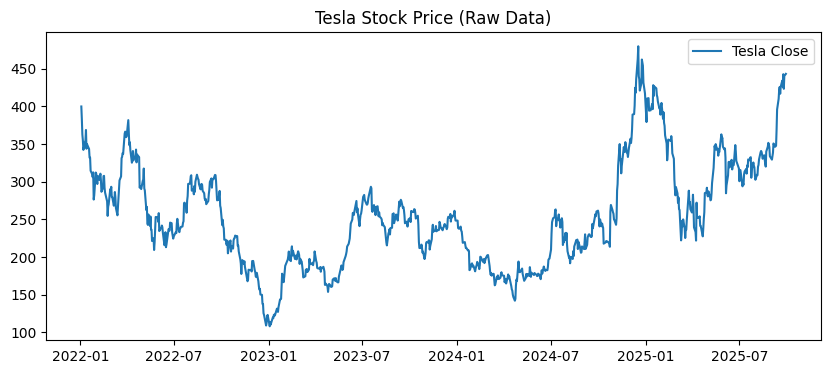

=== [Original Series] ===
--- ADF Test (regression='c') ---
ADF Statistic  : -1.9738
p-value        : 0.298185
Used Lag       : 10
# of Obs       : 927
Critical Values:
    1%: -3.437
    5%: -2.865
    10%: -2.568
--> p-value >= 0.05, 귀무가설 기각 불가
    => 비정상(Non-stationary) 시계열일 가능성이 큽니다.

--- KPSS Test (regression='c') ---
KPSS Statistic : 1.0314
p-value        : 0.010000
Used Lags      : 18
Critical Values:
    10%: 0.347
    5%: 0.463
    2.5%: 0.574
    1%: 0.739
--> p-value < 0.05, 귀무가설(정상성) 기각
    => 비정상(Non-stationary) 시계열일 가능성이 큽니다.



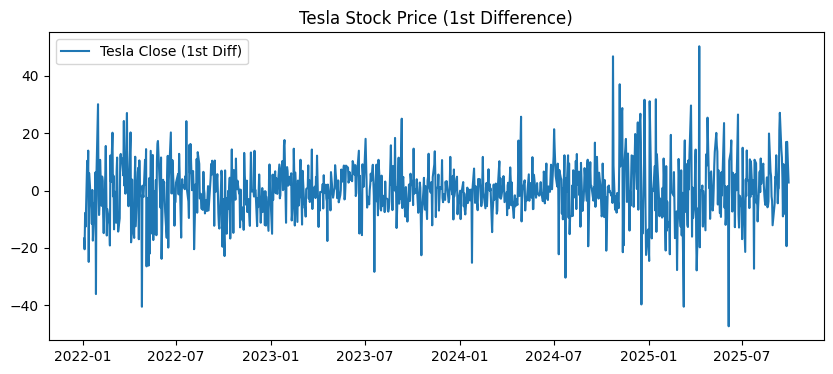

=== [1st Differenced Series] ===
--- ADF Test (regression='c') ---
ADF Statistic  : -8.8051
p-value        : 0.000000
Used Lag       : 9
# of Obs       : 927
Critical Values:
    1%: -3.437
    5%: -2.865
    10%: -2.568
--> p-value < 0.05, 귀무가설(단위근 존재) 기각
    => 정상성(Stationary) 시계열로 볼 수 있습니다.

--- KPSS Test (regression='c') ---
KPSS Statistic : 0.3318
p-value        : 0.100000
Used Lags      : 0
Critical Values:
    10%: 0.347
    5%: 0.463
    2.5%: 0.574
    1%: 0.739
--> p-value >= 0.05, 귀무가설(정상성) 기각 불가
    => 정상성(Stationary) 시계열로 볼 수 있습니다.



In [3]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# ADF, KPSS
from statsmodels.tsa.stattools import adfuller, kpss

# ---------------------------
# (1) 테슬라(TSLA) 주가 불러오기
# ---------------------------
df = yf.download("TSLA", start="2022-01-01", end="2025-09-30")

# MultiIndex 제거
df.columns = df.columns.droplevel(1)
df.reset_index(inplace=True)
df.set_index("Date", inplace=True)

# 종가만 시계열로 사용
ts_data = df["Close"].dropna()

print("=== [원시계열: Tesla Close] 상위 5개 데이터 ===")
print(ts_data.head())
print()

# ---------------------------
# (2) 시계열 Plot
# ---------------------------
plt.figure(figsize=(10,4))
plt.plot(ts_data, label="Tesla Close")
plt.title("Tesla Stock Price (Raw Data)")
plt.legend()
plt.show()

# ---------------------------
# (3) ADF & KPSS 검정 함수
# ---------------------------

def run_adf_test(series, alpha=0.05, reg_type="c"):
    """
    ADF(단위근) 검정을 수행하고, p-value에 따른 결과를 콘솔에 출력.
    reg_type('c' 또는 'ct')는 ADF에서의 trend 설정(level or trend).
    """
    adf_result = adfuller(series, autolag="AIC", regression=reg_type)
    adf_stat, p_val, usedlag, nobs, crit_vals, icbest = adf_result

    print(f"--- ADF Test (regression='{reg_type}') ---")
    print(f"ADF Statistic  : {adf_stat:.4f}")
    print(f"p-value        : {p_val:.6f}")
    print(f"Used Lag       : {usedlag}")
    print(f"# of Obs       : {nobs}")
    print("Critical Values:")
    for k, v in crit_vals.items():
        print(f"    {k}: {v:.3f}")

    # 결과 분기: p-value < alpha => 정상성
    if p_val < alpha:
        print(f"--> p-value < {alpha}, 귀무가설(단위근 존재) 기각")
        print("    => 정상성(Stationary) 시계열로 볼 수 있습니다.\n")
    else:
        print(f"--> p-value >= {alpha}, 귀무가설 기각 불가")
        print("    => 비정상(Non-stationary) 시계열일 가능성이 큽니다.\n")


def run_kpss_test(series, alpha=0.05, reg_type="c"):
    """
    KPSS 검정을 수행. 귀무가설: '시계열이 (약)정상적(Stationary)'.
    reg_type('c' 또는 'ct') => level or trend stationarity.
    """
    kpss_result = kpss(series, regression=reg_type, nlags="auto")
    kpss_stat, p_val, lags, crit_vals = kpss_result

    print(f"--- KPSS Test (regression='{reg_type}') ---")
    print(f"KPSS Statistic : {kpss_stat:.4f}")
    print(f"p-value        : {p_val:.6f}")
    print(f"Used Lags      : {lags}")
    print("Critical Values:")
    for k, v in crit_vals.items():
        print(f"    {k}: {v:.3f}")

    # 결과 분기: p-value < alpha => 정상성을 기각 => 비정상
    if p_val < alpha:
        print(f"--> p-value < {alpha}, 귀무가설(정상성) 기각")
        print("    => 비정상(Non-stationary) 시계열일 가능성이 큽니다.\n")
    else:
        print(f"--> p-value >= {alpha}, 귀무가설(정상성) 기각 불가")
        print("    => 정상성(Stationary) 시계열로 볼 수 있습니다.\n")

# ---------------------------
# (4) ADF + KPSS (원 시계열)
# ---------------------------
print("=== [Original Series] ===")
run_adf_test(ts_data, alpha=0.05, reg_type="c")
run_kpss_test(ts_data, alpha=0.05, reg_type="c")

# ---------------------------
# (5) 1차 차분 후 ADF + KPSS
# ---------------------------
diff_data = ts_data.diff().dropna()

plt.figure(figsize=(10,4))
plt.plot(diff_data, label="Tesla Close (1st Diff)")
plt.title("Tesla Stock Price (1st Difference)")
plt.legend()
plt.show()

print("=== [1st Differenced Series] ===")
run_adf_test(diff_data, alpha=0.05, reg_type="c")
run_kpss_test(diff_data, alpha=0.05, reg_type="c")


## 코드 상세 해설
테슬라 주가 다운로드

yfinance로 2022년~2025년 9월까지 데이터 수집

Close 열만 추출 → ts_data

ADF & KPSS 함수

run_adf_test(series, alpha=0.05, reg_type="c")

autolag="AIC"

regression="c" → Level stationarity(상수항만 포함)

reg_type="ct"로 바꾸면 추세(t)까지 반영

p-value < 0.05 → “단위근(비정상성) 귀무가설 기각” → 정상 시계열

run_kpss_test(series, alpha=0.05, reg_type="c")

귀무가설: 시계열은 정상적

p-value < 0.05 → 귀무가설(정상성) 기각 → “비정상성”

nlags="auto"로 최적 지연 수를 자동 결정

regression="c": level stationarity, "ct": trend stationarity

원 시계열(주가)에 대한 검정

ADF 결과 vs. KPSS 결과를 비교

만약 ADF에서는 p-value가 크고, KPSS에서는 p-value가 작다면, “비정상성”으로 볼 가능성이 큼

1차 차분 후 검정

diff_data = ts_data.diff().dropna()

ADF/KPSS 모두 p-value < 0.05가 나오면, 1차 차분으로 정상성이 확보되었다고 볼 수 있음

## KPSS & ADF 해석 팁
ADF(귀무: 비정상) vs. KPSS(귀무: 정상)

시계열이 정말 정상적이라면,

ADF: p-value가 충분히 작아서(5% 미만) → 귀무가설(비정상) 기각

KPSS: p-value가 충분히 커서(5% 이상) → 귀무가설(정상) 채택

현업에서는 두 검정 결과가 서로 모순인 경우도 종종 있습니다. 이 경우,

차분이나 변환(로그 등)을 추가 검토

잔차 분석, 그래프 해석, 다른 통계적 테스트를 병행